In [91]:
import pandas as pd
import numpy as np
import category_encoders as ce
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from matplotlib import pyplot as plt
import seaborn as sns

In [92]:
pd.options.mode.chained_assignment = None  #  no important. This is for avoiding the warning of chained assignments
train_df = pd.read_csv('laptops.csv',encoding = "ISO-8859-1")
train_df.head()

Unnamed: 0 Company      Product   TypeName  Inches  \
0           1   Apple  MacBook Pro  Ultrabook    13.3   
1           2   Apple  Macbook Air  Ultrabook    13.3   
2           3      HP       250 G6   Notebook    15.6   
3           4   Apple  MacBook Pro  Ultrabook    15.4   
4           5   Apple  MacBook Pro  Ultrabook    13.3   

                     ScreenResolution                         Cpu   Ram  \
0  IPS Panel Retina Display 2560x1600        Intel Core i5 2.3GHz   8GB   
1                            1440x900        Intel Core i5 1.8GHz   8GB   
2                   Full HD 1920x1080  Intel Core i5 7200U 2.5GHz   8GB   
3  IPS Panel Retina Display 2880x1800        Intel Core i7 2.7GHz  16GB   
4  IPS Panel Retina Display 2560x1600        Intel Core i5 3.1GHz   8GB   

                Memory                           Gpu  OpSys  Weight  \
0            128GB SSD  Intel Iris Plus Graphics 640  macOS  1.37kg   
1  128GB Flash Storage        Intel HD Graphics 6000  macOS  1.34kg   
2            256GB SSD         Intel HD Graphics 620  No OS  1.86kg   
3            512GB SSD            AMD Radeon Pro 455  macOS  1.83kg   
4            256GB SSD  Intel Iris Plus Graphics 650  macOS  1.37kg   

   Price_euros  
0      1339.69  
1       898.94  
2       575.00  
3      2537.45  
4      1803.60

# Cleaning


In [93]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   Product           1303 non-null   object 
 3   TypeName          1303 non-null   object 
 4   Inches            1303 non-null   float64
 5   ScreenResolution  1303 non-null   object 
 6   Cpu               1303 non-null   object 
 7   Ram               1303 non-null   object 
 8   Memory            1303 non-null   object 
 9   Gpu               1303 non-null   object 
 10  OpSys             1303 non-null   object 
 11  Weight            1303 non-null   object 
 12  Price_euros       1303 non-null   float64
dtypes: float64(2), int64(1), object(10)
memory usage: 132.5+ KB


In [94]:
train_df.isnull().sum() #checking empty cells
#There is nothing to clean here

Unnamed: 0          0
Company             0
Product             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price_euros         0
dtype: int64

# Pre-processing & Feature Engineering


In [95]:
# convert weight and Inches columns into numerical types
 
train_df['Weight'] = train_df['Weight'].apply(lambda x: str(x).strip('kg')) # remove kg from the Weight objects
train_df['Weight'] = pd.to_numeric(train_df['Weight']) # convert the weight into float64 type
train_df['Inches']= pd.to_numeric(train_df['Inches']) # convert inches into float64


In [96]:
train_df.describe()

Unnamed: 0       Inches       Weight  Price_euros
count  1303.000000  1303.000000  1303.000000  1303.000000
mean    660.155794    15.017191     2.038734  1123.686992
std     381.172104     1.426304     0.665475   699.009043
min       1.000000    10.100000     0.690000   174.000000
25%     331.500000    14.000000     1.500000   599.000000
50%     659.000000    15.600000     2.040000   977.000000
75%     990.500000    15.600000     2.300000  1487.880000
max    1320.000000    18.400000     4.700000  6099.000000

Text(0.5, 1.0, 'Spread of the price in different ranges')

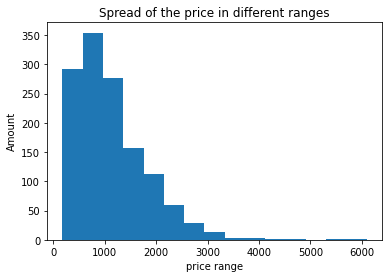

In [97]:
plt.hist(train_df['Price_euros'], bins=15)
plt.xlabel('price range')
plt.ylabel('Amount')
plt.title('Spread of the price in different ranges')

In [98]:
# identify howmany unique values in each columns
for i in train_df.columns:
    print(i,   len(list(train_df[i].unique())))

Unnamed: 0 1303
Company 19
Product 618
TypeName 6
Inches 18
ScreenResolution 40
Cpu 118
Ram 9
Memory 39
Gpu 110
OpSys 9
Weight 171
Price_euros 791


# Feature Encoding

In [99]:
# Encodingb the categorical features
categorical = train_df.drop(columns= ['Unnamed: 0','Inches','Weight','Price_euros'],axis=1)
cat_col =categorical.columns
cat_col

Index(['Company', 'Product', 'TypeName', 'ScreenResolution', 'Cpu', 'Ram',
       'Memory', 'Gpu', 'OpSys'],
      dtype='object')

In [100]:
encoded_df= pd.DataFrame({})
for col in cat_col:
    temp = train_df.groupby(train_df[col])['Price_euros'].mean()#get the mean values of the price that mapped each category in a particular column
    temp_dict = dict(temp)
    encoded_df[col] = train_df[col].apply(lambda x:temp_dict.get(x) ) # encoding the each category in a particular column by the mean value 
    
  
    
train_df_1 = train_df[['Inches','Weight']].join(encoded_df) #joinning encoded categories and non-categorical features into asingle dataframe
train_df_1



Inches  Weight      Company      Product     TypeName  ScreenResolution  \
0       13.3    1.37  1564.198571  2005.513000  1548.230357       1679.956667   
1       13.3    1.34  1564.198571  1028.820000  1548.230357       1038.660000   
2       15.6    1.86  1067.774854   467.602381   782.078624       1156.530256   
3       15.4    1.83  1564.198571  2005.513000  1548.230357       2493.847500   
4       13.3    1.37  1564.198571  2005.513000  1548.230357       1679.956667   
...      ...     ...          ...          ...          ...               ...   
1298    14.0    1.80  1086.384444   638.000000  1282.401653       1201.118491   
1299    13.3    1.30  1086.384444  1499.000000  1282.401653       1576.666667   
1300    14.0    1.50  1086.384444   242.000000   782.078624        542.210498   
1301    15.6    2.19  1067.774854   764.000000   782.078624        542.210498   
1302    15.6    2.20  1104.169367   369.000000   782.078624        542.210498   

              Cpu          Ram       Memory          Gpu        OpSys  
0     1429.120000  1180.812940   707.774342  1764.011250  1749.630769  
1     1028.820000  1180.812940   707.985000  1022.728000  1749.630769  
2      918.467842  1180.812940  1229.387451  1141.168434   587.973333  
3     2537.450000  1936.771150  1860.811017  2537.450000  1749.630769  
4     1921.800000  1180.812940  1229.387451  1921.800000  1749.630769  
...           ...          ...          ...          ...          ...  
1298  1278.902245   574.572480   707.774342  1051.020378  1168.139478  
1299  1278.902245  1936.771150  1860.811017  1051.020378  1168.139478  
1300   324.454545   254.370455   435.677333   397.843793  1168.139478  
1301  1278.902245   615.206341   674.152242   747.641429  1168.139478  
1302   324.454545   574.572480   627.923409   397.843793  1168.139478  

[1303 rows x 11 columns]

In [101]:
train_df_1.describe()

Inches       Weight      Company      Product     TypeName  \
count  1303.000000  1303.000000  1303.000000  1303.000000  1303.000000   
mean     15.017191     2.038734  1123.686992  1123.686992  1123.686992   
std       1.426304     0.665475   282.644401   665.604666   432.597078   
min      10.100000     0.690000   217.425000   174.000000   636.232000   
25%      14.000000     1.500000  1067.774854   609.337368   782.078624   
50%      15.600000     2.040000  1086.384444   988.000000   782.078624   
75%      15.600000     2.300000  1186.068990  1516.904000  1548.230357   
max      18.400000     4.700000  3346.142857  4389.000000  2280.358966   

       ScreenResolution          Cpu          Ram       Memory          Gpu  \
count       1303.000000  1303.000000  1303.000000  1303.000000  1303.000000   
mean        1123.686992  1123.686992  1123.686992  1123.686992  1123.686992   
std          447.420806   561.327087   537.119994   526.868200   549.277442   
min          265.000000   199.000000   254.370455   224.333333   282.798000   
25%          674.214783   744.804444   574.572480   674.152242   899.000000   
50%         1156.530256  1044.238235  1180.812940  1229.387451  1141.168434   
75%         1355.167261  1337.511567  1180.812940  1266.822766  1204.224848   
max         3042.042000  4899.000000  3975.000000  3624.100000  4007.333333   

             OpSys  
count  1303.000000  
mean   1123.686992  
std     225.865209  
min     434.000000  
25%    1168.139478  
50%    1168.139478  
75%    1168.139478  
max    1749.630769

In [102]:
train_df

Unnamed: 0 Company                              Product  \
0              1   Apple                          MacBook Pro   
1              2   Apple                          Macbook Air   
2              3      HP                               250 G6   
3              4   Apple                          MacBook Pro   
4              5   Apple                          MacBook Pro   
...          ...     ...                                  ...   
1298        1316  Lenovo                       Yoga 500-14ISK   
1299        1317  Lenovo                       Yoga 900-13ISK   
1300        1318  Lenovo                   IdeaPad 100S-14IBR   
1301        1319      HP  15-AC110nv (i7-6500U/6GB/1TB/Radeon   
1302        1320    Asus  X553SA-XX031T (N3050/4GB/500GB/W10)   

                TypeName  Inches                            ScreenResolution  \
0              Ultrabook    13.3          IPS Panel Retina Display 2560x1600   
1              Ultrabook    13.3                                    1440x900   
2               Notebook    15.6                           Full HD 1920x1080   
3              Ultrabook    15.4          IPS Panel Retina Display 2880x1800   
4              Ultrabook    13.3          IPS Panel Retina Display 2560x1600   
...                  ...     ...                                         ...   
1298  2 in 1 Convertible    14.0   IPS Panel Full HD / Touchscreen 1920x1080   
1299  2 in 1 Convertible    13.3  IPS Panel Quad HD+ / Touchscreen 3200x1800   
1300            Notebook    14.0                                    1366x768   
1301            Notebook    15.6                                    1366x768   
1302            Notebook    15.6                                    1366x768   

                                       Cpu   Ram               Memory  \
0                     Intel Core i5 2.3GHz   8GB            128GB SSD   
1                     Intel Core i5 1.8GHz   8GB  128GB Flash Storage   
2               Intel Core i5 7200U 2.5GHz   8GB            256GB SSD   
3                     Intel Core i7 2.7GHz  16GB            512GB SSD   
4                     Intel Core i5 3.1GHz   8GB            256GB SSD   
...                                    ...   ...                  ...   
1298            Intel Core i7 6500U 2.5GHz   4GB            128GB SSD   
1299            Intel Core i7 6500U 2.5GHz  16GB            512GB SSD   
1300  Intel Celeron Dual Core N3050 1.6GHz   2GB   64GB Flash Storage   
1301            Intel Core i7 6500U 2.5GHz   6GB              1TB HDD   
1302  Intel Celeron Dual Core N3050 1.6GHz   4GB            500GB HDD   

                               Gpu       OpSys  Weight  Price_euros  
0     Intel Iris Plus Graphics 640       macOS    1.37      1339.69  
1           Intel HD Graphics 6000       macOS    1.34       898.94  
2            Intel HD Graphics 620       No OS    1.86       575.00  
3               AMD Radeon Pro 455       macOS    1.83      2537.45  
4     Intel Iris Plus Graphics 650       macOS    1.37      1803.60  
...                            ...         ...     ...          ...  
1298         Intel HD Graphics 520  Windows 10    1.80       638.00  
1299         Intel HD Graphics 520  Windows 10    1.30      1499.00  
1300             Intel HD Graphics  Windows 10    1.50       229.00  
1301            AMD Radeon R5 M330  Windows 10    2.19       764.00  
1302             Intel HD Graphics  Windows 10    2.20       369.00  

[1303 rows x 13 columns]

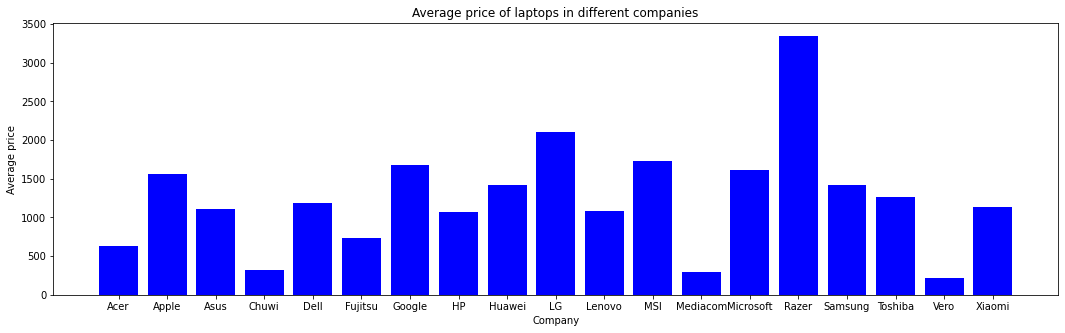

In [103]:
y = train_df.groupby(train_df['Company'])['Price_euros'].mean()
y= dict(y)
x = list(y.keys())
y = list(y.values())
plt.figure(figsize=(18,5))
plt.bar(x,y,color ='blue')
plt.xlabel('Company')
plt.ylabel('Average price')
plt.title('Average price of laptops in different companies')
plt.savefig('companies')


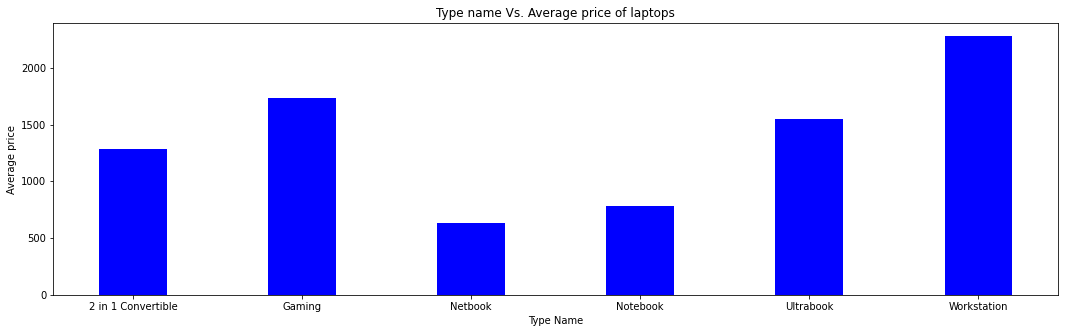

In [117]:
y = train_df.groupby(train_df['TypeName'])['Price_euros'].mean()
y= dict(y)
x = list(y.keys())
y = list(y.values())
plt.figure(figsize=(18,5))
plt.bar(x,y,width =0.4,color ='blue')
plt.xlabel('Type Name')
plt.ylabel('Average price')
plt.title('Type name Vs. Average price of laptops')
plt.savefig('typename')


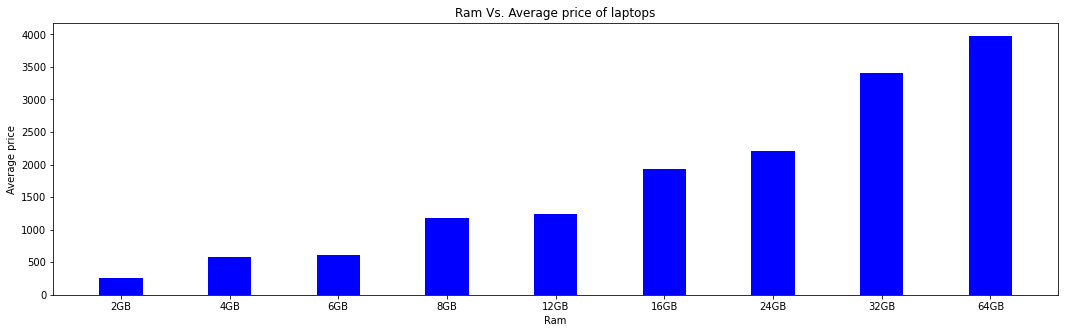

In [105]:
y = (train_df.groupby(train_df['Ram'])['Price_euros'].mean()).sort_values()
y= dict(y)
x = list(y.keys())
y = list(y.values())
plt.figure(figsize=(18,5))
plt.bar(x,y,width =0.4,color ='blue')
plt.xlabel('Ram')
plt.ylabel('Average price')
plt.title('Ram Vs. Average price of laptops' )
plt.savefig('Ram')


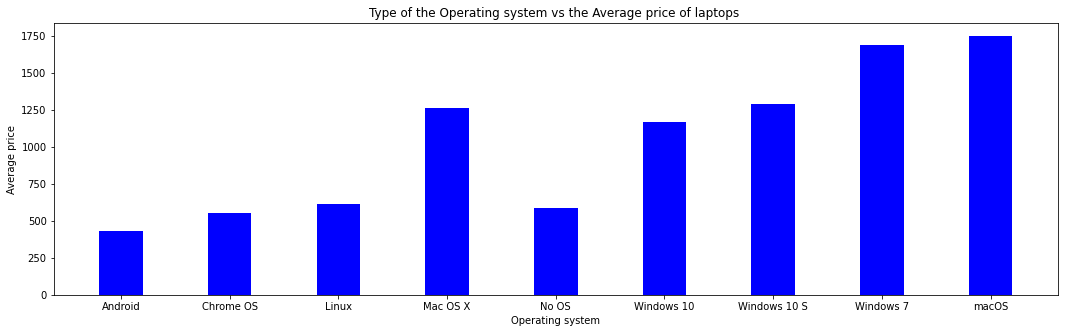

In [106]:

y = train_df.groupby(train_df['OpSys'])['Price_euros'].mean()
y= dict(y)
x = list(y.keys())
y = list(y.values())
plt.figure(figsize=(18,5))
plt.bar(x,y,width =0.4,color ='blue')
plt.xlabel('Operating system')
plt.ylabel('Average price')
plt.title('Type of the Operating system vs the Average price of laptops ')
plt.savefig('OpSys')



In [107]:
# encoding the target
train_df['Price_euros'].describe()

count    1303.000000
mean     1123.686992
std       699.009043
min       174.000000
25%       599.000000
50%       977.000000
75%      1487.880000
max      6099.000000
Name: Price_euros, dtype: float64

In [108]:
lower = np.percentile(np.array(train_df['Price_euros']), 34)
upper = np.percentile(np.array(train_df['Price_euros']), 66)

print('median of the price : ', np.median(train_df['Price_euros']))
print('34% th percentile ', lower)
print('66% th percentile ', upper)

median of the price :  977.0
34% th percentile  729.0
66% th percentile  1262.0


In [109]:
def price(x):
    if x > upper:
        val = 'HIGH'
        
    elif x < lower:
        val = 'DOWN'
    else :
        val ='MEDIUM'
        
    return val

y= train_df['Price_euros'].apply(lambda x: price(x)) 
y



0         HIGH
1       MEDIUM
2         DOWN
3         HIGH
4         HIGH
         ...  
1298      DOWN
1299      HIGH
1300      DOWN
1301    MEDIUM
1302      DOWN
Name: Price_euros, Length: 1303, dtype: object

In [110]:
ms = MinMaxScaler()
encoded_df_nor = ms.fit_transform(train_df_1)
cols= list(train_df_1.columns)
X = pd.DataFrame(encoded_df_nor, columns = cols)


AxesSubplot(0.125,0.125;0.62x0.755)


Inches    Weight   Company   Product  TypeName  \
Inches            1.000000  0.827631  0.037771  0.057920  0.016542   
Weight            0.827631  1.000000  0.034770  0.209622  0.171590   
Company           0.037771  0.034770  1.000000  0.424685  0.326408   
Product           0.057920  0.209622  0.424685  1.000000  0.634819   
TypeName          0.016542  0.171590  0.326408  0.634819  1.000000   
ScreenResolution -0.003169  0.038561  0.212861  0.599974  0.415350   
Cpu               0.207890  0.336272  0.369740  0.767932  0.601238   
Ram               0.213667  0.348840  0.331482  0.716701  0.524033   
Memory            0.091071  0.172460  0.316552  0.694356  0.498053   
Gpu               0.271312  0.430106  0.342043  0.786452  0.581727   
OpSys            -0.063201 -0.048809  0.125003  0.317632  0.206954   

                  ScreenResolution       Cpu       Ram    Memory       Gpu  \
Inches                   -0.003169  0.207890  0.213667  0.091071  0.271312   
Weight                    0.038561  0.336272  0.348840  0.172460  0.430106   
Company                   0.212861  0.369740  0.331482  0.316552  0.342043   
Product                   0.599974  0.767932  0.716701  0.694356  0.786452   
TypeName                  0.415350  0.601238  0.524033  0.498053  0.581727   
ScreenResolution          1.000000  0.561552  0.543999  0.597677  0.462289   
Cpu                       0.561552  1.000000  0.719885  0.639053  0.758763   
Ram                       0.543999  0.719885  1.000000  0.742657  0.657587   
Memory                    0.597677  0.639053  0.742657  1.000000  0.576503   
Gpu                       0.462289  0.758763  0.657587  0.576503  1.000000   
OpSys                     0.212991  0.242186  0.158410  0.230105  0.246655   

                     OpSys  
Inches           -0.063201  
Weight           -0.048809  
Company           0.125003  
Product           0.317632  
TypeName          0.206954  
ScreenResolution  0.212991  
Cpu               0.242186  
Ram               0.158410  
Memory            0.230105  
Gpu               0.246655  
OpSys             1.000000

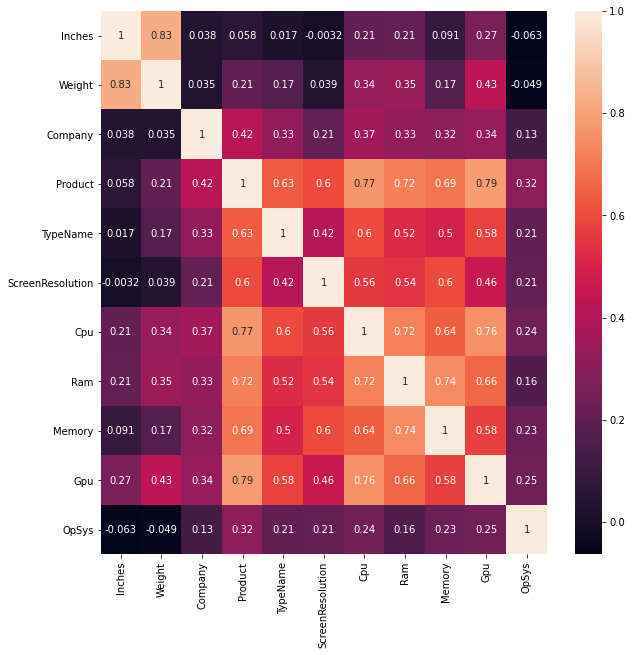

In [111]:
fig, ax = plt.subplots(figsize=(10,10))

print(sns.heatmap(X.corr(),annot = True,ax=ax))
plt.savefig('Correlation between each columns.jpg')
X.corr() #checking correlation

In [112]:
train_df

Unnamed: 0 Company                              Product  \
0              1   Apple                          MacBook Pro   
1              2   Apple                          Macbook Air   
2              3      HP                               250 G6   
3              4   Apple                          MacBook Pro   
4              5   Apple                          MacBook Pro   
...          ...     ...                                  ...   
1298        1316  Lenovo                       Yoga 500-14ISK   
1299        1317  Lenovo                       Yoga 900-13ISK   
1300        1318  Lenovo                   IdeaPad 100S-14IBR   
1301        1319      HP  15-AC110nv (i7-6500U/6GB/1TB/Radeon   
1302        1320    Asus  X553SA-XX031T (N3050/4GB/500GB/W10)   

                TypeName  Inches                            ScreenResolution  \
0              Ultrabook    13.3          IPS Panel Retina Display 2560x1600   
1              Ultrabook    13.3                                    1440x900   
2               Notebook    15.6                           Full HD 1920x1080   
3              Ultrabook    15.4          IPS Panel Retina Display 2880x1800   
4              Ultrabook    13.3          IPS Panel Retina Display 2560x1600   
...                  ...     ...                                         ...   
1298  2 in 1 Convertible    14.0   IPS Panel Full HD / Touchscreen 1920x1080   
1299  2 in 1 Convertible    13.3  IPS Panel Quad HD+ / Touchscreen 3200x1800   
1300            Notebook    14.0                                    1366x768   
1301            Notebook    15.6                                    1366x768   
1302            Notebook    15.6                                    1366x768   

                                       Cpu   Ram               Memory  \
0                     Intel Core i5 2.3GHz   8GB            128GB SSD   
1                     Intel Core i5 1.8GHz   8GB  128GB Flash Storage   
2               Intel Core i5 7200U 2.5GHz   8GB            256GB SSD   
3                     Intel Core i7 2.7GHz  16GB            512GB SSD   
4                     Intel Core i5 3.1GHz   8GB            256GB SSD   
...                                    ...   ...                  ...   
1298            Intel Core i7 6500U 2.5GHz   4GB            128GB SSD   
1299            Intel Core i7 6500U 2.5GHz  16GB            512GB SSD   
1300  Intel Celeron Dual Core N3050 1.6GHz   2GB   64GB Flash Storage   
1301            Intel Core i7 6500U 2.5GHz   6GB              1TB HDD   
1302  Intel Celeron Dual Core N3050 1.6GHz   4GB            500GB HDD   

                               Gpu       OpSys  Weight  Price_euros  
0     Intel Iris Plus Graphics 640       macOS    1.37      1339.69  
1           Intel HD Graphics 6000       macOS    1.34       898.94  
2            Intel HD Graphics 620       No OS    1.86       575.00  
3               AMD Radeon Pro 455       macOS    1.83      2537.45  
4     Intel Iris Plus Graphics 650       macOS    1.37      1803.60  
...                            ...         ...     ...          ...  
1298         Intel HD Graphics 520  Windows 10    1.80       638.00  
1299         Intel HD Graphics 520  Windows 10    1.30      1499.00  
1300             Intel HD Graphics  Windows 10    1.50       229.00  
1301            AMD Radeon R5 M330  Windows 10    2.19       764.00  
1302             Intel HD Graphics  Windows 10    2.20       369.00  

[1303 rows x 13 columns]

# Model training & Evaluating

In [113]:
X= X.drop(columns = ['Weight'],axis=1) #drop weight because of the high correlation
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size= 0.3,random_state = 42)

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)

In [114]:
print("Accuracy of knn model:",metrics.accuracy_score(y_test, y_pred))

Accuracy of knn model: 0.8567774936061381


In [115]:
clf=RandomForestClassifier(n_estimators=100)
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)


In [116]:
print("Accuracy of random forest knn model:",metrics.accuracy_score(y_test, y_pred))

Accuracy of random forest knn model: 0.9181585677749361
